In [2]:
signnames_p = "signnames.csv"
test_p = "test.p"
train_p = "train.p"
valid_p = "valid.p"

In [3]:
import keras

import tensorflow as tf

from __future__ import absolute_import, division, print_function
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import matplotlib.pyplot as plt
from IPython import display
%matplotlib inline
from tensorflow import keras
# try:
#   tf.enable_eager_execution()
#   print('Running in Eager mode.')
# except ValueError:
#   print('Already running in Eager mode')

from builtins import range, input
from keras.layers import Input, Lambda, Dense, Flatten, Dropout, GlobalAveragePooling2D
from keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50

# from keras.applications.inception_v3 import inception_v3
from keras.applications.inception_v3 import InceptionV3

from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.vis_utils import plot_model
# from tensorflow.contrib.layers import Flatten

from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
from time import time
import pickle
from sklearn.utils import shuffle

import pandas as pd
import random
import seaborn as sns


# Step 0: Load The Data

In [4]:
# Load pickled data

# TODO: Fill this in based on where you saved the training and testing data
# If you have a folder in your Drive named traffic-signs-data you do so, else change directory

with open(train_p, mode='rb') as f:
    train = pickle.load(f)
with open(valid_p, mode='rb') as f:
    valid = pickle.load(f)
with open(test_p, mode='rb') as f:
    test = pickle.load(f)

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

In [5]:
# Please complete None with your code
#-------------------------------------------------------------------------
signs = []
signnames = pd.read_csv(signnames_p, delimiter=',', header=0)
for row in range(signnames.shape[0]):
     signs.append(signnames.iloc[row, 1])    

In [6]:
signnames.head()

,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)


In [7]:
signnames.items

<bound method DataFrame.items of     ClassId                                           SignName
0         0                               Speed limit (20km/h)
1         1                               Speed limit (30km/h)
2         2                               Speed limit (50km/h)
3         3                               Speed limit (60km/h)
4         4                               Speed limit (70km/h)
5         5                               Speed limit (80km/h)
6         6                        End of speed limit (80km/h)
7         7                              Speed limit (100km/h)
8         8                              Speed limit (120km/h)
9         9                                         No passing
10       10       No passing for vechiles over 3.5 metric tons
11       11              Right-of-way at the next intersection
12       12                                      Priority road
13       13                                              Yield
14       14           

In [8]:
signs[:5]

['Speed limit (20km/h)',
 'Speed limit (30km/h)',
 'Speed limit (50km/h)',
 'Speed limit (60km/h)',
 'Speed limit (70km/h)']

In [9]:
print(train.keys())
print(test.keys())
print(valid.keys())

dict_keys(['coords', 'labels', 'features', 'sizes'])
dict_keys(['sizes', 'coords', 'features', 'labels'])
dict_keys(['coords', 'labels', 'features', 'sizes'])


In [10]:
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [11]:
print("training", X_train.shape)
print("validation", X_valid.shape)
print("testing", X_test.shape)
print("training_class", y_train.shape)
print("validation_class", y_valid.shape)
print("testing_class", y_test.shape)
print(type(y_test))

training (34799, 32, 32, 3)
validation (4410, 32, 32, 3)
testing (12630, 32, 32, 3)
training_class (34799,)
validation_class (4410,)
testing_class (12630,)
<class 'numpy.ndarray'>


In [12]:
X_test[0].shape
x = np.unique(train["labels"])
# unique, counts = np.unique(y_train, return_counts=True)
# # print(np.asarray((unique, counts)).T)
# np.size(x)
x
np.size(x)

43

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [13]:
# Please complete None with your code
#-------------------------------------------------------------------------
#  Number of training examples
n_train = X_train.shape[0]

# Number of validation examples
n_validation = X_valid.shape[0]

# Number of test examples.
n_test = X_test.shape[0]

#  What's the shape of a traffic sign image?
image_shape = X_test[0].shape

#  How many unique classes/labels there are in the dataset.
unique_label = np.unique(test["labels"])
n_classes = len(unique_label)


print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Number of valid examples =", n_validation)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

# output
# Number of training examples = 34799
# Number of testing examples = 12630
# Number of valid examples = 4410
# Image data shape = (32, 32, 3)
# Number of classes = 43

Number of training examples = 34799
Number of testing examples = 12630
Number of valid examples = 4410
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

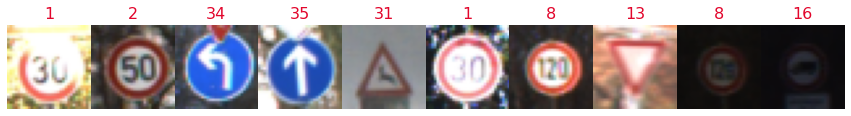

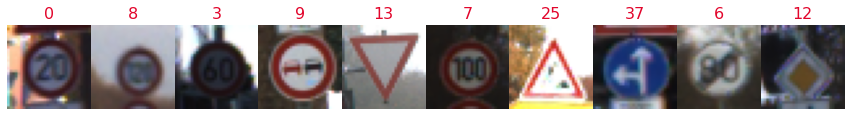

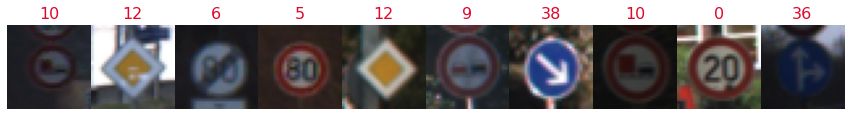

In [13]:
### Data exploration visualization code goes here.
def show_images(X,Y,r,c):
    fig, axs = plt.subplots(r,c, figsize=(15, 6))
    fig.subplots_adjust(hspace = .2, wspace=.001)
    axs = axs.ravel()
    for i in range(10): # if rows = 2 and columns = 5 i should take 10 values
        index = random.randint(0, len(X))
        image = X[index]
        axs[i].axis('off')
        axs[i].imshow(image)
        axs[i].set_title(Y[index], fontsize=16, c="#E2062C")
    plt.show() 

# show image of 10 random data points
rows = 1
columns = 10
# show_images (None)
show_images(X_train,y_train,rows, columns)
show_images(X_test,y_test,rows, columns)
show_images(X_valid,y_valid,rows, columns)

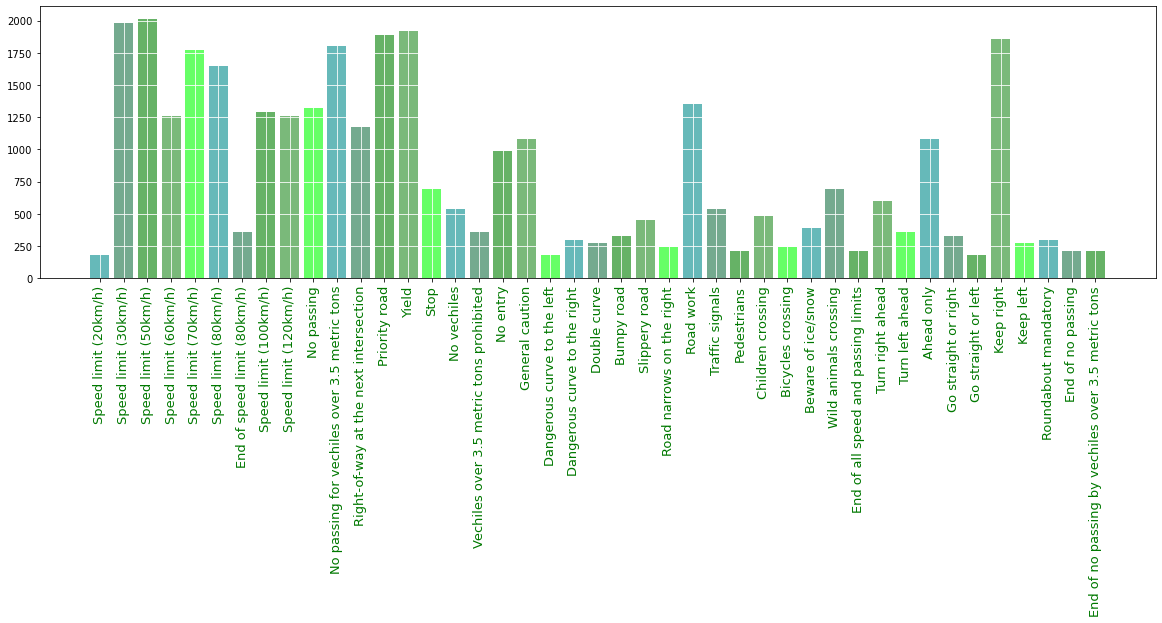

In [14]:
%matplotlib inline
plt.figure(figsize=(20,5))

item, count = np.unique(y_train, return_counts=True)
#names is a list of traffic signs, Remember that we already have a list : signs
names = signs
y_pos = np.arange(len(names))
plt.bar(item, count, alpha=0.6, color=['#008B8B', '#177245', 'green', '#228B22', '#00FF00'] )

plt.xticks(y_pos, names, fontsize=13, c="#007800", rotation=90)

plt.grid(c="w")
plt.show()

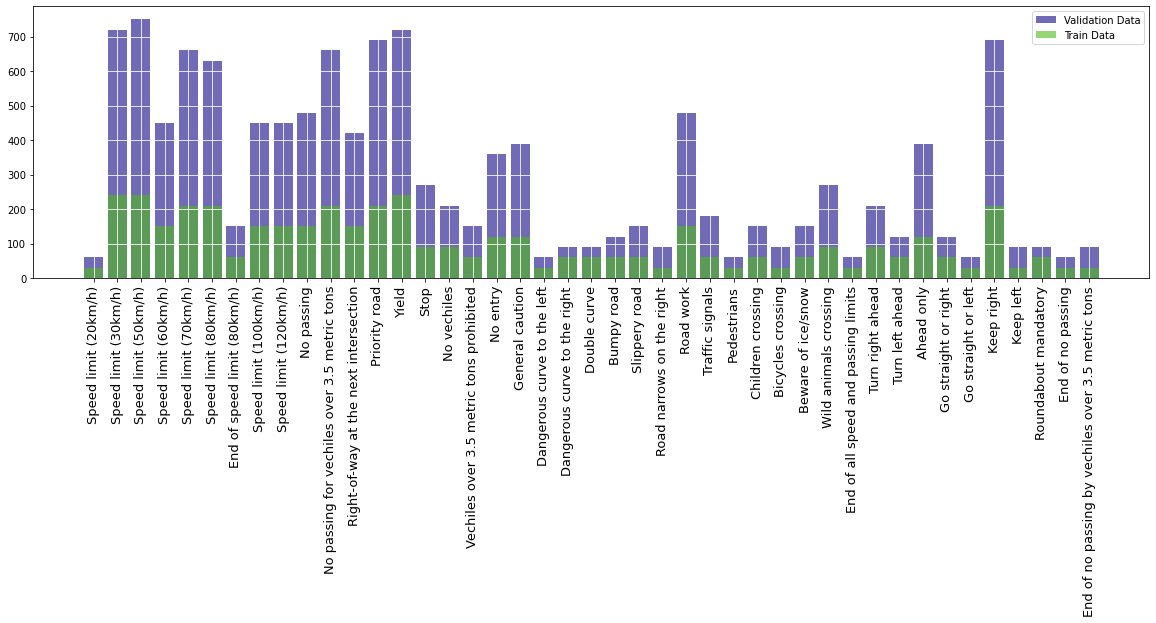

In [15]:
%matplotlib inline
plt.figure(figsize=(20,5))
item, count = np.unique(y_test, return_counts=True)
item1, count1 = np.unique(y_valid, return_counts=True)


y_pos = np.arange(len(signs))
plt.bar(item, count, alpha=0.6, color = (0.07,0.03,0.53), label="Validation Data" )

plt.bar(item1, count1, alpha=0.6, color = (0.3,0.73,0.09), label="Train Data" )

plt.xticks(y_pos, signs, fontsize=13, rotation=90)
plt.legend()
plt.grid(c="w")
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [16]:
# gray scale
X_test_gry = np.sum(X_test/3, axis=3, keepdims=True)
X_train_gry = np.sum(X_train/3, axis=3, keepdims=True)
X_valid_gry = np.sum(X_valid/3, axis=3, keepdims=True)

In [17]:
print('Colored:', X_train.shape)
print('Grayscale:', X_train_gry.shape)

Colored: (34799, 32, 32, 3)
Grayscale: (34799, 32, 32, 1)


In [18]:
print(X_test_gry[1][0][:3])
X_test_gry.dtype

[[63.33333333]
 [76.66666667]
 [78.66666667]]


dtype('float64')

In [19]:
# normalization Here 
 
X_test_norm = (X_test_gry - 128)/ 128
X_train_norm = (X_train_gry - 128)/ 128
X_valid_norm =(X_valid_gry - 128)/ 128

In [20]:
print('Normal:', X_test_gry[1][0][:3])
print('Scaled:', X_test_norm[1][0][:3], "between -1 & 1")

Normal: [[63.33333333]
 [76.66666667]
 [78.66666667]]
Scaled: [[-0.50520833]
 [-0.40104167]
 [-0.38541667]] between -1 & 1


In [21]:
# from sklearn.utils import shuffle

# X_train_norm, y_train = shuffle(X_train_norm, y_train)

In [22]:
import cv2

def random_translate(img):
    rows,cols,_ = img.shape
    
    # allow translation up to px pixels in x and y directions
    px = 2
    dx,dy = np.random.randint(-px,px,2)

    M = np.float32([[1,0,dx],[0,1,dy]])
    dst = cv2.warpAffine(img,M,(cols,rows))
    
    dst = dst[:,:,np.newaxis]
    
    return dst

shape in/out: (32, 32, 1) (32, 32, 1)


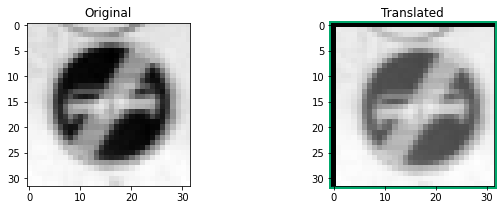

In [23]:
# visualize
%matplotlib inline
test_img = X_train_norm[25]

test_dst = random_translate(test_img)

fig, axs = plt.subplots(1,2, figsize=(10, 3))
# show original image before translation
axs[0].imshow(test_img.squeeze(), cmap="binary")
axs[0].set_title('Original')
# show with translation
axs[1].imshow(test_dst.squeeze(), cmap="binary")
axs[1].patch.set_edgecolor('#00A86B')  
axs[1].patch.set_linewidth('5') 
axs[1].set_title('Translated')

print('shape in/out:', test_img.shape, test_dst.shape)

Next cells should be useful for data augmentation

In [24]:
def random_scaling(img):   
    rows,cols,_ = img.shape

    # transform limits
    px = np.random.randint(-2,2)

    # ending locations
    pts1 = np.float32([[px,px],
                       [rows-px,px],
                       [px,cols-px],
                       [rows-px,cols-px]])

    # starting locations (4 corners)
    pts2 = np.float32([[0,0],
                       [rows,0],
                       [0,cols],
                       [rows,cols]])

    M = cv2.getPerspectiveTransform(pts1,pts2)

    dst = cv2.warpPerspective(img,M,(rows,cols))
    
    dst = dst[:,:,np.newaxis]
    
    return dst

shape in/out: (32, 32, 1) (32, 32, 1)


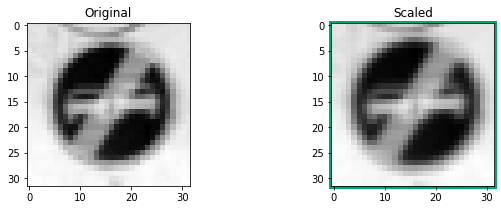

In [25]:
# visualize scaling
test_img = X_train_norm[25]

test_dst = random_scaling(test_img)

fig, axs = plt.subplots(1,2, figsize=(10, 3))
# show original image before translation
axs[0].imshow(test_img.squeeze(), cmap="binary")
axs[0].set_title('Original')
# show with translation
axs[1].imshow(test_dst.squeeze(), cmap="binary")
axs[1].patch.set_edgecolor('#00A86B')  
axs[1].patch.set_linewidth('5') 
axs[1].set_title('Scaled')

print('shape in/out:', test_img.shape, test_dst.shape)

In [26]:
def random_warp(img):
    
    rows,cols,_ = img.shape

    # random scaling coefficients
    rndx = np.random.rand(3) - 0.5
    rndx *= cols * 0.06   # this coefficient determines the degree of warping
    rndy = np.random.rand(3) - 0.5
    rndy *= rows * 0.06

    # 3 starting points for transform, 1/4 way from edges
    x1 = cols / 4
    x2 = 3 * cols / 4
    y1 = rows / 4
    y2 = 3 * rows / 4

    pts1 = np.float32([[y1,x1],
                       [y2,x1],
                       [y1,x2]])
    pts2 = np.float32([[y1+rndy[0],x1+rndx[0]],
                       [y2+rndy[1],x1+rndx[1]],
                       [y1+rndy[2],x2+rndx[2]]])

    M = cv2.getAffineTransform(pts1,pts2)

    dst = cv2.warpAffine(img,M,(cols,rows))
    
    dst = dst[:,:,np.newaxis]
    
    return dst

shape in/out: (32, 32, 1) (32, 32, 1)


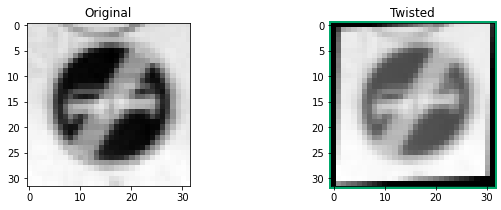

In [27]:
# visualize image after deforming it 
test_img = X_train_norm[25]

test_dst = random_warp(test_img)

fig, axs = plt.subplots(1,2, figsize=(10, 3))
# show original image before translation
axs[0].imshow(test_img.squeeze(), cmap="binary")
axs[0].set_title('Original')
# show with translation
axs[1].imshow(test_dst.squeeze(), cmap="binary")
axs[1].patch.set_edgecolor('#00A86B')  
axs[1].patch.set_linewidth('5') 
axs[1].set_title('Twisted')

print('shape in/out:', test_img.shape, test_dst.shape)

In [28]:
def random_brightness(img):
    shifted = img + 1.0   # shift to (0,2) range
    img_max_value = max(shifted.flatten())
    max_coef = 2.0/img_max_value
    min_coef = max_coef - 0.1
    coef = np.random.uniform(min_coef, max_coef)
    dst = shifted * coef - 1.0
    return dst

shape in/out: (32, 32, 1) (32, 32, 1)


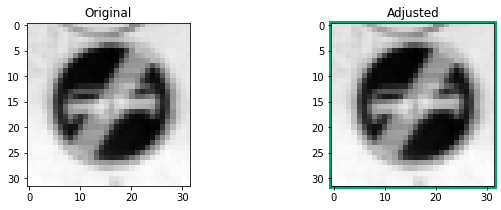

In [29]:
# visualize image after adjusting the brightness 
test_img = X_train_norm[25]

test_dst = random_brightness(test_img)

fig, axs = plt.subplots(1,2, figsize=(10, 3))
# show original image before translation
axs[0].imshow(test_img.squeeze(), cmap="binary")
axs[0].set_title('Original')
# show with translation
axs[1].imshow(test_dst.squeeze(), cmap="binary")
axs[1].patch.set_edgecolor('#00A86B')  
axs[1].patch.set_linewidth('5') 
axs[1].set_title('Adjusted')

print('shape in/out:', test_img.shape, test_dst.shape)


In [30]:
# exploratory of the data
from collections import Counter
# create a dict that contain the count of each class 
counter = Counter(y_train)
#convert the values of the dict to list
counter_list = list(counter.values())
# calculate the mean, and get the result as integer
mean = int(np.mean(counter_list)) # 809
# get the min value
min_val = np.min(counter_list) # 180
# get the max value
max_val = np.max(counter_list) # 2010
print(f'Train samples in each class:\n\tThe mean= {mean}.\n\tThe min value= {min_val}.\n\tThe maximum= {max_val}.')

Train samples in each class:
	The mean= 809.
	The min value= 180.
	The maximum= 2010.


In [31]:
# Helper, transofrm a numeric label into the corresponding string
def getNameByLable(label):
    return signnames.loc[label].SignName
getNameByLable(42)

'End of no passing by vechiles over 3.5 metric tons'

In [32]:
# exploratory of the data, most common and most not common

print(" Common 10 Samples :\n","*"*17)
for element in counter.most_common(10):
    print("'{}'".format(getNameByLable(element[0])), 'Train sample : {}'.format(element[1]))

# explore the rare samples
# Sort the dictionary counter and get the last 10 items(which mean the min values)
print("-"*50)
print("-"*50)
print(" Rare 10 Samples :\n","*"*15)
for element in sorted(counter.items(),key=lambda x: x[1])[:10]:
    print("'{}'".format(getNameByLable(element[0])), 'Train sample : {}'.format(element[1]))

 Common 10 Samples :
 *****************
'Speed limit (50km/h)' Train sample : 2010
'Speed limit (30km/h)' Train sample : 1980
'Yield' Train sample : 1920
'Priority road' Train sample : 1890
'Keep right' Train sample : 1860
'No passing for vechiles over 3.5 metric tons' Train sample : 1800
'Speed limit (70km/h)' Train sample : 1770
'Speed limit (80km/h)' Train sample : 1650
'Road work' Train sample : 1350
'No passing' Train sample : 1320
--------------------------------------------------
--------------------------------------------------
 Rare 10 Samples :
 ***************
'Go straight or left' Train sample : 180
'Dangerous curve to the left' Train sample : 180
'Speed limit (20km/h)' Train sample : 180
'End of no passing' Train sample : 210
'End of no passing by vechiles over 3.5 metric tons' Train sample : 210
'End of all speed and passing limits' Train sample : 210
'Pedestrians' Train sample : 210
'Bicycles crossing' Train sample : 240
'Road narrows on the right' Train sample : 240
'K

In [33]:
print(np.bincount(y_train))
print("minimum samples for any label:", min(np.bincount(y_train)))

[ 180 1980 2010 1260 1770 1650  360 1290 1260 1320 1800 1170 1890 1920
  690  540  360  990 1080  180  300  270  330  450  240 1350  540  210
  480  240  390  690  210  599  360 1080  330  180 1860  270  300  210
  210]
minimum samples for any label: 180


In [34]:
# the data is imbalanced we need data augmentation
print('X, y shapes:', X_train_norm.shape, y_train.shape)

X, y shapes: (34799, 32, 32, 1) (34799,)


In [44]:
# Data augmentation 
# This may take too much time...
# i've set 2000 as a minimum number of images for each class, you can choose another number of n-samples
# if u don't already have a file containing generated Data, Run ME please
# --------------------------!!!!-----------------------------------------

input_indices = []
output_indices = []

for class_n in range(n_classes):
    class_indices = np.where(y_train == class_n)
    n_samples = len(class_indices[0])
    if n_samples < 2000:
        for i in range(2000 - n_samples):
            input_indices.append(class_indices[0][i%n_samples])
            output_indices.append(X_train_norm.shape[0])
            new_img = X_train_norm[class_indices[0][i % n_samples]]
            new_img = random_translate(random_scaling(random_warp(random_brightness(new_img))))
            X_train_norm = np.concatenate((X_train_norm, [new_img]), axis=0)
            y_train = np.concatenate((y_train, [class_n]), axis=0)


In [35]:
data_file = "X_train_norm.p"
pickle.dump({"images":X_train_norm,"labels":y_train},open(data_file,"wb"),protocol=4)

In [36]:
# if u do have a file that contains new_train data RUN ME
with open("X_train_norm.p","rb") as f:
    data = pickle.load(f)
new_X_train, y_train = data["images"],data["labels"]


In [37]:
from sklearn.model_selection import train_test_split

X_train, X_validation, y_train, y_validation = train_test_split(new_X_train, y_train, 
                                                                test_size=0.20, random_state=42)

print("Old X_train size:",len(X_train_norm))
print("New X_train size:",len(X_train))
print("X_validation size:",len(X_validation))

Old X_train size: 34799
New X_train size: 27839
X_validation size: 6960


In [38]:
X_train.shape

(27839, 32, 32, 1)

In [44]:
tf.config.run_functions_eagerly(True)

In [45]:
tf.data.experimental.enable_debug_mode()

##  Micronet pretraind model

In [39]:
from tensorflow.keras.optimizers import Adam, SGD, Nadam
import tensorflow.keras.layers as kl
from tensorflow.keras.regularizers import l2

In [40]:
IMG_SIZE = 32

l2_reg_rate = 1e-5  # 0.00001
eps = 1e-7         # 0.0000001
NUM_CLASSES = 43


def get_micronet():
    input_ = kl.Input(shape=(IMG_SIZE,IMG_SIZE,1), name='data')
    # 1-part
    x = kl.Conv2D(filters=1, kernel_size=(1,1), padding='same', kernel_regularizer=l2(l2_reg_rate))(input_)
    x = kl.BatchNormalization(epsilon=eps)(x)
    x = kl.ReLU()(x)
    # 2-part
    x = kl.Conv2D(filters=29, kernel_size=(5,5), kernel_regularizer=l2(l2_reg_rate))(x)
    x = kl.BatchNormalization(epsilon=eps)(x)
    x = kl.ReLU()(x)
    x = kl.MaxPooling2D(pool_size=3, strides=2)(x)
    # 3-part
    x = kl.Conv2D(filters=59, kernel_size=(3,3), padding='same', kernel_regularizer=l2(l2_reg_rate))(x)
    x = kl.BatchNormalization(epsilon=eps)(x)
    x = kl.ReLU()(x)
    x = kl.MaxPooling2D(pool_size=3, strides=2)(x)
    # 4-part
    x = kl.Conv2D(filters=74, kernel_size=(3,3), padding='same', kernel_regularizer=l2(l2_reg_rate))(x)
    x = kl.BatchNormalization(epsilon=eps)(x)
    x = kl.ReLU()(x)
    x = kl.MaxPooling2D(pool_size=3, strides=2)(x)
    # 5-part
    x = kl.Flatten()(x)
    x = kl.Dense(300, kernel_regularizer=l2(l2_reg_rate))(x)
    x = kl.BatchNormalization(epsilon=eps)(x)
    x = kl.ReLU()(x)
    x = kl.Dense(300)(x)
    x = kl.ReLU()(x)
    x = kl.Dense(NUM_CLASSES)(x)
    x = kl.Softmax()(x)
    return Model(inputs=input_, outputs=x)



In [41]:
model = get_micronet()

In [42]:

def create_lr_decay(decay_step_size, lr_decay_rate):
    def lr_decay(epoch, lr):
        if epoch % decay_step_size == 0:
            lr = lr * lr_decay_rate
        return lr
    return lr_decay

lr = 0.0007
lr_decay = create_lr_decay(decay_step_size=2, lr_decay_rate=0.9996)

In [43]:
BATCH_SIZE = 50
opt = tf.keras.optimizers.SGD(
    learning_rate=lr,
    momentum=0.9,
    nesterov=True,
)

model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [44]:
# this is number of gpus in my laptop, i have one (nvidia gpu gtx 1050)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [45]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 data (InputLayer)           [(None, 32, 32, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 1)         2         
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 1)        4         
 ormalization)                                                   
                                                                 
 re_lu (ReLU)                (None, 32, 32, 1)         0         
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 29)        754       
                                                                 
 batch_normalization_1 (Batc  (None, 28, 28, 29)       116       
 hNormalization)                                             

In [46]:
from tensorflow.keras.utils import to_categorical

In [48]:
# convert the labels of validation and training to one hot encoding
y_train1 = to_categorical(y_train, 43)
y_validation1 = to_categorical(y_validation, 43)

In [49]:
hist = model.fit(X_train, 
                 y_train1, 
                 epochs=100, 
                 batch_size=BATCH_SIZE, validation_data=(X_validation, y_validation1))

Epoch 1/100
557/557 [==============================] - 30s 31ms/step - loss: 2.5655 - accuracy: 0.3637 - val_loss: 2.0281 - val_accuracy: 0.5388
Epoch 2/100
557/557 [==============================] - 15s 28ms/step - loss: 1.1148 - accuracy: 0.7581 - val_loss: 0.6933 - val_accuracy: 0.8647
Epoch 3/100
557/557 [==============================] - 18s 33ms/step - loss: 0.5048 - accuracy: 0.9061 - val_loss: 0.3726 - val_accuracy: 0.9325
Epoch 4/100
557/557 [==============================] - 20s 36ms/step - loss: 0.2858 - accuracy: 0.9525 - val_loss: 0.2341 - val_accuracy: 0.9631
Epoch 5/100
557/557 [==============================] - 16s 28ms/step - loss: 0.1867 - accuracy: 0.9706 - val_loss: 0.1573 - val_accuracy: 0.9773
Epoch 6/100
557/557 [==============================] - 20s 36ms/step - loss: 0.1347 - accuracy: 0.9806 - val_loss: 0.1647 - val_accuracy: 0.9716
Epoch 7/100
557/557 [==============================] - 16s 29ms/step - loss: 0.1040 - accuracy: 0.9855 - val_loss: 0.1107 - val_ac

557/557 [==============================] - 9s 17ms/step - loss: 0.0072 - accuracy: 0.9999 - val_loss: 0.0270 - val_accuracy: 0.9947
Epoch 58/100
557/557 [==============================] - 9s 17ms/step - loss: 0.0074 - accuracy: 0.9999 - val_loss: 0.0263 - val_accuracy: 0.9948
Epoch 59/100
557/557 [==============================] - 9s 17ms/step - loss: 0.0070 - accuracy: 0.9999 - val_loss: 0.0261 - val_accuracy: 0.9947
Epoch 60/100
557/557 [==============================] - 9s 17ms/step - loss: 0.0073 - accuracy: 0.9999 - val_loss: 0.0263 - val_accuracy: 0.9944
Epoch 61/100
557/557 [==============================] - 9s 17ms/step - loss: 0.0071 - accuracy: 0.9999 - val_loss: 0.0244 - val_accuracy: 0.9953
Epoch 62/100
557/557 [==============================] - 9s 17ms/step - loss: 0.0070 - accuracy: 0.9999 - val_loss: 0.0252 - val_accuracy: 0.9951
Epoch 63/100
557/557 [==============================] - 10s 17ms/step - loss: 0.0068 - accuracy: 0.9999 - val_loss: 0.0253 - val_accuracy: 0.99

In [50]:
# Convert test labels to one hot encoding
y_test1 = to_categorical(y_test, 43)

In [51]:
#Calculate the evaluation of the model of testing, training and validation data
score_test = model.evaluate(X_test_norm, y_test1, verbose=0)
score_train = model.evaluate(X_train,y_train1, verbose=0)
score_valid = model.evaluate(X_validation, y_validation1, verbose=0)

# Get the Loss and the Accuracy of testing
aTest = score_test[0]
bTest = score_test[1]*100
# Get the Loss and the Accuracy of training
aTrain = score_train[0]
bTrain = score_train[1]*100
# Get the Loss and the Accuracy of validation
aValid = score_valid[0]
bValid = score_valid[1]*100


print(f'Test loss = {aTest:.2f}')
print(f'Test accuracy = {bTest:.2f} %')

print("-"*25)

print(f'Train loss = {aTrain:.2f}')
print(f'Train accuracy = {bTrain:.2f} %')

print("-"*28)

print(f'Validation loss = {aValid:.2f}')
print(f'Validation accuracy = {bValid:.2f} %')


Test loss = 0.18
Test accuracy = 95.19 %
-------------------------
Train loss = 0.00
Train accuracy = 100.00 %
----------------------------
Validation loss = 0.02
Validation accuracy = 99.50 %


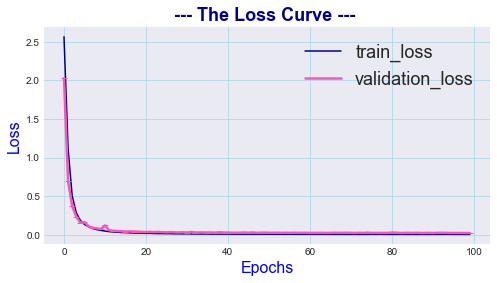

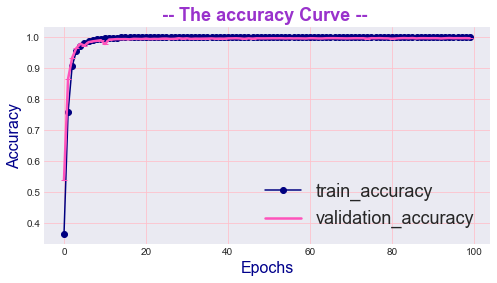

In [52]:
plt.style.use("seaborn-dark")

plt.figure(figsize=[8, 4])
epoch_range = range(0, 100)
loss = hist.history['loss']
val_loss = hist.history['val_loss']
plt.plot(epoch_range, loss, c='navy', linewidth=1.5, marker="")
plt.plot(epoch_range, val_loss, c='#FE53BB', linewidth=2.5, marker="_")
plt.legend(['train_loss', 'validation_loss'], fontsize=18, loc="best")
plt.xlabel("Epochs", fontsize=16, color="blue")
plt.ylabel("Loss", fontsize=16, color="blue")
plt.title("--- The Loss Curve --- ", fontsize=18, color="darkblue", fontweight="bold")
plt.grid(c="lightblue")
plt.figure(figsize=[8, 4])

epoch_range = range(0, 100) 

acc = hist.history['accuracy']
val_acc =hist.history['val_accuracy']

plt.plot(epoch_range, acc, c='navy', linewidth=1.5, marker="o")
plt.plot(epoch_range, val_acc, c='#FE53BB', linewidth=2.5, marker="_")

plt.legend(['train_accuracy', 'validation_accuracy'], fontsize=18, loc="best")

plt.xlabel("Epochs", fontsize=16, c="darkblue")
plt.ylabel("Accuracy", fontsize=16, c="darkblue")
plt.title("-- The accuracy Curve -- ", fontsize=18, c="darkorchid", fontweight="bold")
plt.grid(c="pink")

In [65]:
tf.data.experimental.enable_debug_mode()

In [53]:
y_true = tf.argmax(y_test1, axis = 1)
predicted_classes = np.argmax(model.predict(X_test_norm), axis=-1)

### Confusion Matrix

In [54]:
cm = confusion_matrix(y_true, predicted_classes)
# accuracies = cm/cm.sum(1)

Text(0.5, 1.0, 'Confusion Matrix')

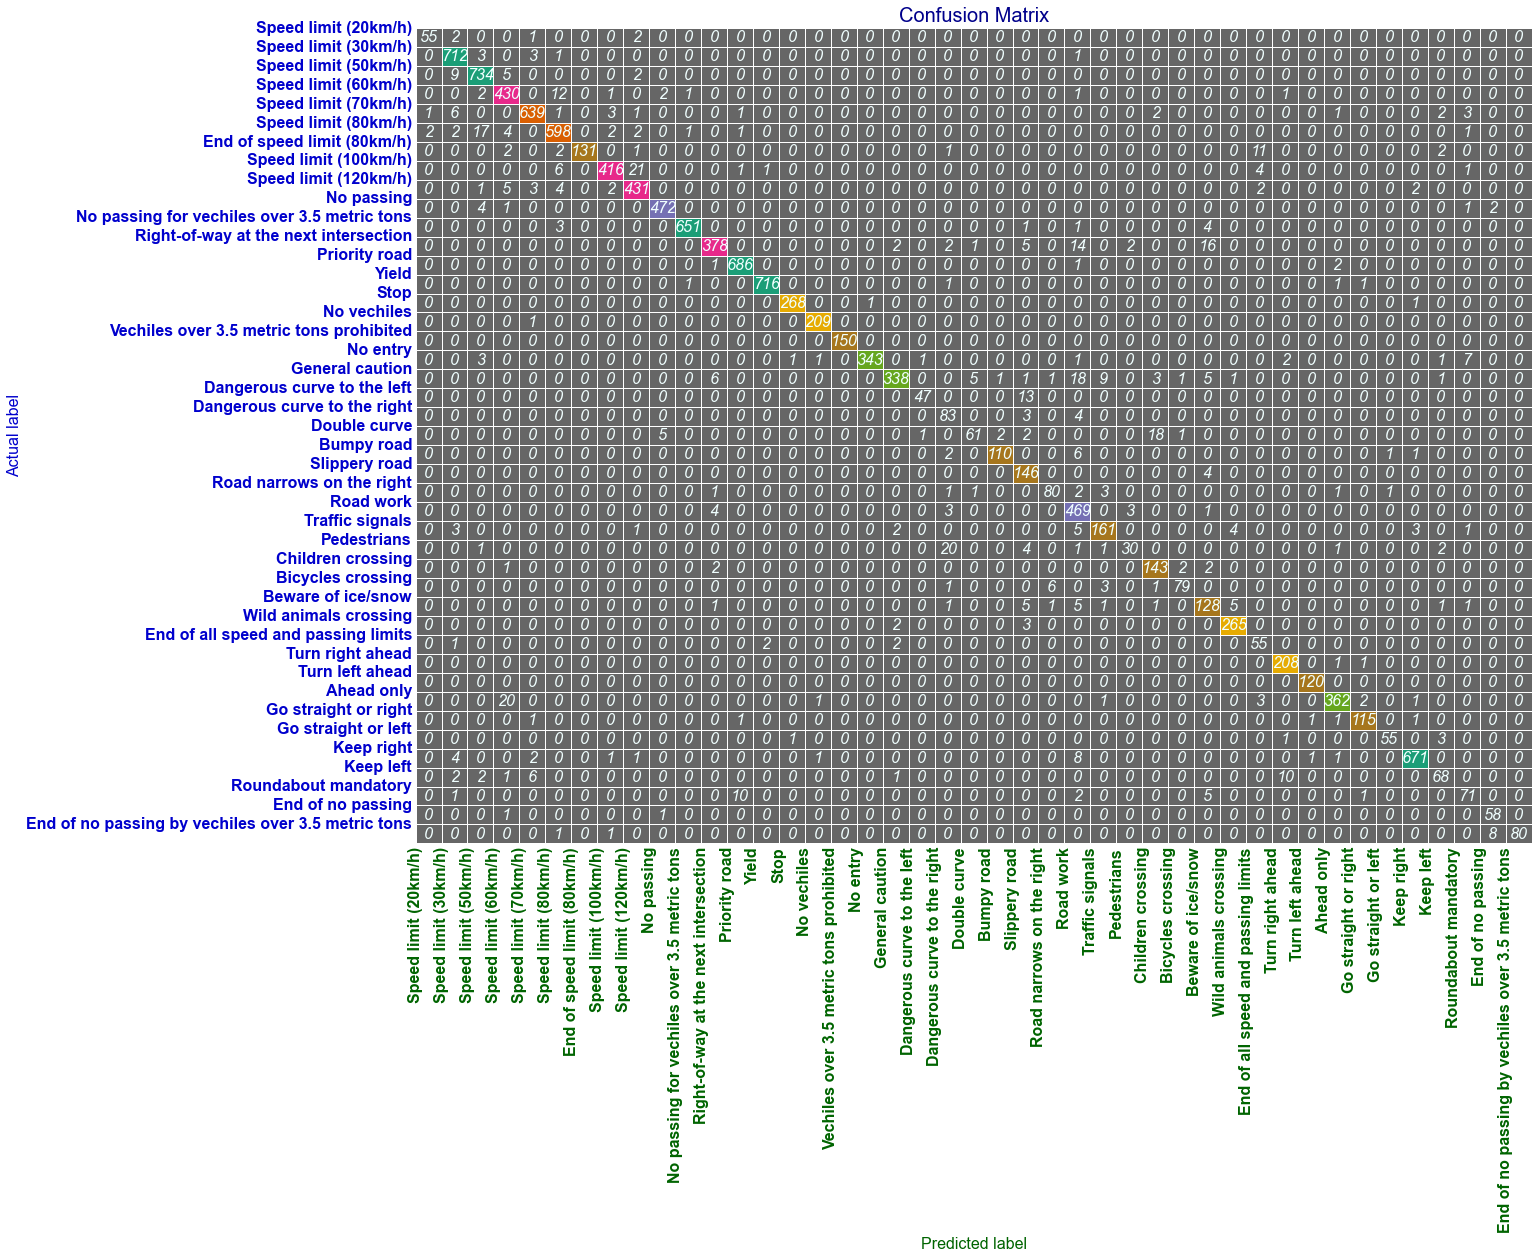

In [55]:
# plt.figure(figsize=(12,10))
plt.figure(figsize=(20,15))
axsub=plt.subplot(111)

annot_kws={'fontsize':16, 
           'fontstyle':'italic',
           'color':"azure"}
sns.heatmap(cm,
            linewidths=0.7,
            color="pink",
            annot = True, 
            cbar = False, 
            cmap='Dark2_r', 
            fmt="d",
            ax=axsub,
            # xticklabels=signs, 
            # yticklabels=signs,
            annot_kws=annot_kws)

plt.xticks(range(len(signs)), signs, fontsize=16, fontweight="bold", rotation=90, c="darkgreen")
plt.yticks(range(len(signs)), signs,  fontsize=16, fontweight="bold",rotation=0, c="mediumblue")
plt.ylabel('Actual label',fontsize=16, c="mediumblue")
plt.xlabel('Predicted label',fontsize=16, c="darkgreen")
plt.title('Confusion Matrix',fontsize=20, c="darkblue")


In [56]:
# We will use the test dataset to test trained model's prediction 
# of instances that it has never seen during training.
print("Test Set\t= {} samples".format(len(X_test)))
print('n_classes\t= {}'.format(n_classes))
X_test.shape

Test Set	= 12630 samples
n_classes	= 43


(12630, 32, 32, 3)

In [57]:
# we have also our xtest normalized above and ytest one hot encoded
print("Test Set Normalized : {} samples".format(len(X_test_norm)))
print('labels encoded     : {}'.format(len(y_test1)))
X_test_norm.shape
X_test_norm[1][1][:5]

Test Set Normalized : 12630 samples
labels encoded     : 12630


array([[-0.51822917],
       [-0.36979167],
       [-0.3828125 ],
       [-0.34375   ],
       [-0.4140625 ]])

In [58]:
performance = model.evaluate(X_test_norm, y_test1)
dict(zip(model.metrics_names, performance))

395/395 [==============================] - 3s 7ms/step - loss: 0.1848 - accuracy: 0.9519


{'loss': 0.18479962646961212, 'accuracy': 0.9518606662750244}

In [59]:
# Save the Model
MODEL_NAME = "ResNet34_sgd_jupyter.h5"
model.save(MODEL_NAME)

In [66]:
#Accuracy of each class
classwise_acc = cm.diagonal()/cm.sum(axis=1) * 100 
cls_acc = pd.DataFrame({'Class_Label':[signs[i] for i in range(43)], 'Accuracy': classwise_acc.tolist()}, columns = ['Class_Label', 'Accuracy'])

cls_acc.style.format({"Accuracy": "{:,.2f}",}).hide_index().bar(subset=["Accuracy"])

cam = sns.light_palette("purple", as_cmap=True)
cls_acc.style.background_gradient(cmap=cam).set_precision(2)

,Class_Label,Accuracy
0,Speed limit (20km/h),91.67
1,Speed limit (30km/h),98.89
2,Speed limit (50km/h),97.87
3,Speed limit (60km/h),95.56
4,Speed limit (70km/h),96.82
5,Speed limit (80km/h),94.92
6,End of speed limit (80km/h),87.33
7,Speed limit (100km/h),92.44
8,Speed limit (120km/h),95.78
9,No passing,98.33


In [67]:
X_test_norm.shape
y_test.shape

(12630,)

# Plot some random prediction and compare with the oroginals

In [68]:
# Pick 10 random images
sample_indexes = random.sample(range(len(X_test_norm)), 10)
sample_indexes
sample_images = [X_test_norm[i] for i in sample_indexes]
sample_images[1][1][0]
labels = np.argmax(y_test1, axis=1)
sample_labels = [labels[i] for i in sample_indexes]
sample_labels

[11, 12, 9, 1, 2, 29, 2, 13, 25, 12]

In [70]:
y_pred = model.predict(X_test_norm)
y_pred[1][0]

1.2323845e-06

In [71]:
predicted = model.predict(X_test_norm[sample_indexes].reshape(10, 32, 32, 1))
print(sample_labels[0])
print(predicted_classes)

11
[16  1 38 ... 32  7 10]


In [72]:
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 14

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [73]:
# color='green' if np.argmax(y_test1[r]) == np.argmax(model.predict(X_test_norm[r].reshape(1, 32, 32, 1))) else 'red'

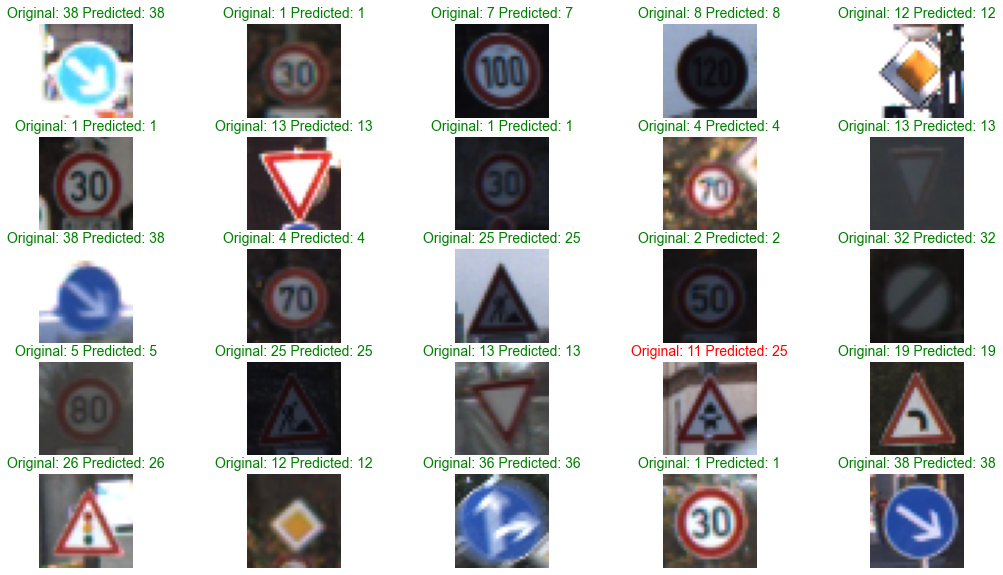

In [74]:
# plt.rcParams['font.size'] = 11
fig2, axes2 = plt.subplots(5,5, figsize=(18,10))
for i,ax2 in enumerate(axes2.flat):
    r = np.random.randint(X_test_norm.shape[0])
    ax2.imshow(X_test[r].astype('uint8'))
    ax2.grid(False)
    ax2.axis('off')
    color='green' if np.argmax(y_test1[r]) == np.argmax(model.predict(X_test_norm[r].reshape(1, 32, 32, 1))) else 'red'
    ax2.set_title('Original: {} Predicted: {}'.format(np.argmax(y_test1[r]), 
                                                     np.argmax(model.predict(X_test_norm[r].reshape(1, 32, 32, 1)))),color=color)
plt.show()

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

- In this case study, we want to classify images of traffic signs using deep Convolutional Neural Networks (CNNs).
- The dataset consists of 43 different classes of images. 
- Classes are as listed below: 
  - 0 = Speed limit (20km/h) 
  - 1 = Speed limit (30km/h)
  - 2 = Speed limit (50km/h) 
  - 3 = Speed limit (60km/h)
  - 4 = Speed limit (70km/h) 
  - 5 = Speed limit (80km/h)
  - 6 = End of speed limit (80km/h)
  - 7 = Speed limit (100km/h)
  - 8 = Speed limit (120km/h)
  - 9 = No passing
  - 10 = No passing for vehicles over 3.5 metric tons
  - 11 = Right-of-way at the next intersection
  - 12 = Priority road
  - 13 = Yield
  - 14 = Stop
  - 15 = No vehicles
  - 16 = Vehicles over 3.5 metric tons prohibited
  - 17 = No entry
  - 18 = General caution
  - 19 = Dangerous curve to the left
  - 20 = Dangerous curve to the right
  - 21 = Double curve
  - 22 = Bumpy road
  - 23 = Slippery road
  - 24 = Road narrows on the right
  - 25 = Road work
  - 26 = Traffic signals
  - 27 = Pedestrians
  - 28 = Children crossing 
  - 29 = Bicycles crossing
  - 30 = Beware of ice/snow
  - 31 = Wild animals crossing
  - 32 = End of all speed and passing limits
  - 33 = Turn right ahead
  - 34 = Turn left ahead
  - 35 = Ahead only
  - 36 = Go straight or right
  - 37 = Go straight or left
  - 38 = Keep right
  - 39 = Keep left
  - 40 = Roundabout mandatory
  - 41 = End of no passing
  - 42 = End of no passing by vehicles over 3.5 metric tons

- Citation
J. Stallkamp, M. Schlipsing, J. Salmen, and C. Igel. The German Traffic Sign Recognition Benchmark: A multi-class classification competition. In Proceedings of the IEEE International Joint Conference on Neural Networks, pages 1453–1460. 2011. 
@inproceedings{Stallkamp-IJCNN-2011, author = {Johannes Stallkamp and Marc Schlipsing and Jan Salmen and Christian Igel}, booktitle = {IEEE International Joint Conference on Neural Networks}, title = {The {G}erman {T}raffic {S}ign {R}ecognition {B}enchmark: A multi-class classification competition}, year = {2011}, pages = {1453--1460} }